In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Tensorflow.keras is popular deep learning module in python. In this class, we will practice some basic DL models using Keras.

# **0. ML and DL**

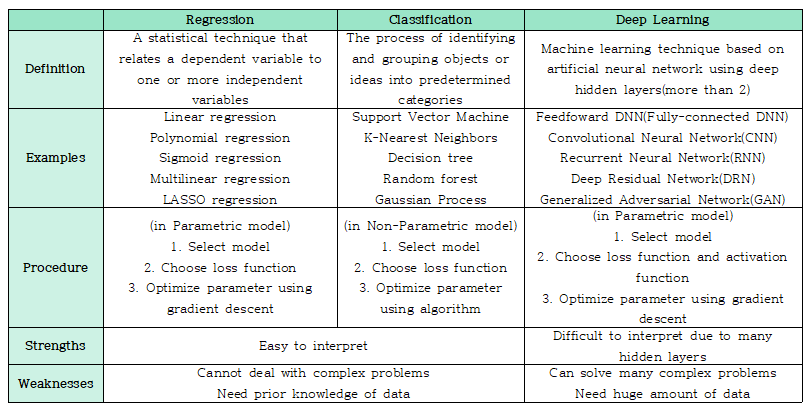

# **1. Feedforward DNN**

**1) Circle data Classification**

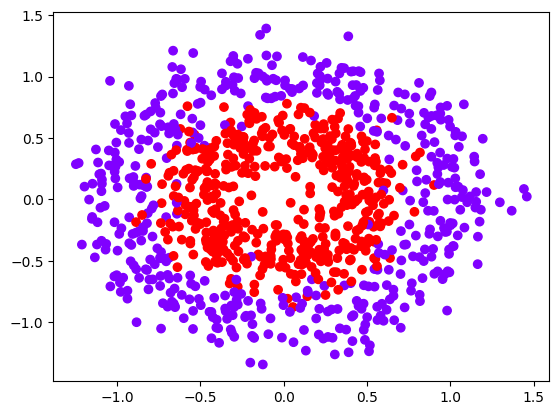

In [4]:
from sklearn.datasets import make_moons, make_circles
Circle_xtrain,Circle_ytrain=make_circles(noise=0.15, factor=0.5, random_state=1,n_samples=10000)
Circle_xtest,Circle_ytest=make_circles(noise=0.15, factor=0.5, random_state=5,n_samples=1000)
plt.scatter(Circle_xtest[:,0],Circle_xtest[:,1],c=Circle_ytest,cmap='rainbow')

We have 10000 data points to train the model(gradient descent), and 1000 data points to test the accuracy of the model.

In [5]:
Circle_xtrain.shape

(10000, 2)

**Sequential()** : creating sequential model

**.add** : Add layer to model

**layers.InputLayer()** : Create a input layer

**layers.Dense()** Create a Fully connected layer

**.summary()**  : Shows summary of the model

In [6]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2)) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

2023-05-03 14:09:10.580788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-03 14:09:10.581018: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


**.compile()** : Set loss function and optimizer

**.fit()** : Fit the data

**.evaluate()** : Evaluate accuracy from the test data

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 2s 865us/step - loss: 0.2281 - acc: 0.8986
Epoch 2/5
1000/1000 [==============================] - 1s 833us/step - loss: 0.1460 - acc: 0.9432
Epoch 3/5
1000/1000 [==============================] - 1s 856us/step - loss: 0.1451 - acc: 0.9453
Epoch 4/5
1000/1000 [==============================] - 1s 785us/step - loss: 0.1412 - acc: 0.9447
Epoch 5/5
32/32 [==============================] - 0s 709us/step - loss: 0.1513 - acc: 0.9440


[0.15127556025981903, 0.9440000057220459]

**Gradient vanishing**

DNN optimizes parameter using modified gradient method. In deep layers, we need to apply chain rule to calculate the derivatives. Since most of the derivative of activation function is less than 1, it is hard to optimize parameters in deep layers. This is the gradient vanishing problem.


Derivative of ReLu(Rectified Linear Unit) function is 1 when input variable is more then 1. So we can prevent gradient vanishing problem to some extent.

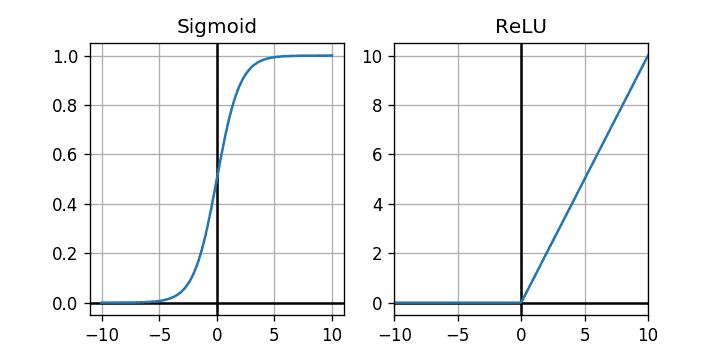

In [8]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2)) 
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 1s 861us/step - loss: 0.6945 - acc: 0.5032
Epoch 2/5
1000/1000 [==============================] - 1s 778us/step - loss: 0.6935 - acc: 0.5000
Epoch 3/5
1000/1000 [==============================] - 1s 794us/step - loss: 0.6935 - acc: 0.5025
Epoch 4/5
1000/1000 [==============================] - 1s 781us/step - loss: 0.6932 - acc: 0.5056
Epoch 5/5
32/32 [==============================] - 0s 741us/step - loss: 0.6626 - acc: 0.5970


[0.6626386642456055, 0.597000002861023]

What does 0.5 acc mean? Does it means 50% correct? If we think about simple model that always predict label as 1, it shows 50% acc. (Broken watch is right twice a day)

Extremely low accuracy is due to the gradient descent. This example shows why we should avoid sigmoid-like functions as an activation function.

What about linear activation function?

**Nonlinear Activation Function**

let's think about linear activation function.

Input layer: $(x_1, x_2)$

Middle layer: $(y_1,y_2) = (a_1x_1+b_1, a_2x_2+b_2)$

Output layer: $(z_1,z_2) = (c_1y_1+d_1, c_2y_2+d_2)$

$  = (c_1(a_1x_1+b_1)+d_1, c_2(a_2x_2+b_2)+d_2)$

$= (c_1a_1x_1+c_1b_1+d_1, c_2a_2x_2+c_2b_2+d_2)$

$= (e_1x_1+f_1, e_2x_2+f_2)$

$e_1=c_1a_1, f_1=c_1b_1+d_1,  e_2=c_2a_2, f_2=c_2b_2+d_2$

If we use Muptiple layers with linear activation function, this is identical to the single layer with linear activation function.

In [9]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2)) 
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(16, activation='linear'))
model.add(layers.Dense(16, activation='linear'))
model.add(layers.Dense(4, activation='linear'))
model.add(layers.Dense(4, activation='linear'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 1s 825us/step - loss: 0.6946 - acc: 0.4962
Epoch 2/5
1000/1000 [==============================] - 1s 774us/step - loss: 0.6936 - acc: 0.4988
Epoch 3/5
1000/1000 [==============================] - 1s 781us/step - loss: 0.6937 - acc: 0.5011
Epoch 4/5
1000/1000 [==============================] - 1s 769us/step - loss: 0.6935 - acc: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 691us/step - loss: 0.6932 - acc: 0.5000


[0.6931607127189636, 0.5]

In [10]:
model=Sequential()
model.add(layers.InputLayer(input_shape=2)) 
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 1s 653us/step - loss: 0.6955 - acc: 0.4920
Epoch 2/5
1000/1000 [==============================] - 1s 639us/step - loss: 0.6953 - acc: 0.4973
Epoch 3/5
1000/1000 [==============================] - 1s 634us/step - loss: 0.6951 - acc: 0.5037
Epoch 4/5
1000/1000 [==============================] - 1s 635us/step - loss: 0.6948 - acc: 0.4865
Epoch 5/5
32/32 [==============================] - 0s 663us/step - loss: 0.6935 - acc: 0.6120


[0.6934787631034851, 0.6119999885559082]

Therefore, we need to use 'relu-like' function in deep layers.

**Serial structure vs Parallel structure**

Optimization using gradient descent does not give global minimum and highly depends on initial values. So we need many parallel nodes to get better optimization.

In [11]:
model=Sequential() # Serial structure
model.add(layers.InputLayer(input_shape=2)) 
for i in range(20):
  model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 8)                 24        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 8)                

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 3s 1ms/step - loss: 0.6933 - acc: 0.4958
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4968
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4930
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4898
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5000


[0.6931701302528381, 0.5]

In [13]:
model=Sequential() # Parallel structure
model.add(layers.InputLayer(input_shape=2)) 
model.add(layers.Dense(160, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 160)               480       
                                                                 
 dense_45 (Dense)            (None, 2)                 322       
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(Circle_xtrain,Circle_ytrain,batch_size=10,epochs=5)
model.evaluate(Circle_xtest,Circle_ytest)

Epoch 1/5
1000/1000 [==============================] - 1s 636us/step - loss: 0.3613 - acc: 0.8703
Epoch 2/5
1000/1000 [==============================] - 1s 652us/step - loss: 0.1554 - acc: 0.9507
Epoch 3/5
1000/1000 [==============================] - 1s 654us/step - loss: 0.1396 - acc: 0.9482
Epoch 4/5
1000/1000 [==============================] - 1s 647us/step - loss: 0.1352 - acc: 0.9487
Epoch 5/5
32/32 [==============================] - 0s 676us/step - loss: 0.1555 - acc: 0.9360


[0.1554829478263855, 0.9359999895095825]

As we can see, parallel structure is important in DNN optimization. And serial structure helps us to learn complicated tasks, so we need 'appropriate' number of layers and 'appropriate' number of parallel nodes.

**2) Mnist handwriting data classification**

In [15]:
(number_xtrain, number_ytrain), (number_xtest,number_ytest) = tf.keras.datasets.mnist.load_data()

In [16]:
number_xtrain.shape

(60000, 28, 28)

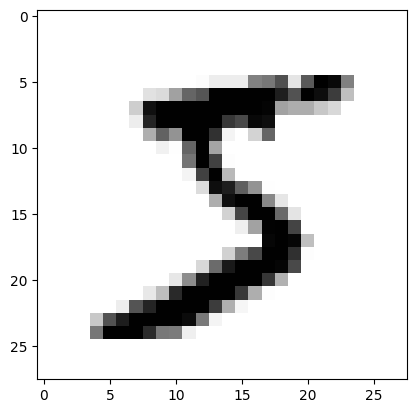

In [17]:
plt.imshow(number_xtrain[0],cmap='binary')

In [18]:
number_xtrain=number_xtrain/255  # normalization
number_xtest=number_xtest/255

**layers.Flatten()** : flatten into 1-d array

**Activation function**

In multi-class classification, softmax function is widely used. (This is generalized sigmoid function)

In [19]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1))) 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 dense_47 (Dense)            (None, 16)                1040      
                                                                 
 dense_48 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(number_xtrain,number_ytrain,batch_size=50,epochs=5)
model.evaluate(number_xtest,number_ytest)

Epoch 1/5
1200/1200 [==============================] - 2s 1ms/step - loss: 0.3579 - acc: 0.8989
Epoch 2/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1568 - acc: 0.9541
Epoch 3/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1160 - acc: 0.9655
Epoch 4/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0948 - acc: 0.9722
Epoch 5/5
313/313 [==============================] - 0s 711us/step - loss: 0.0986 - acc: 0.9699


[0.09856199473142624, 0.9699000120162964]

How does this DNN model succesfully classify handwriting data? We don't know!

**3) Shuffled MNIST data classification**


5


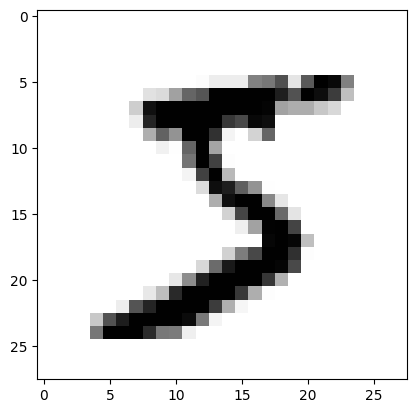

In [21]:
plt.imshow(number_xtrain[0],cmap='binary')
print(number_ytrain[0])

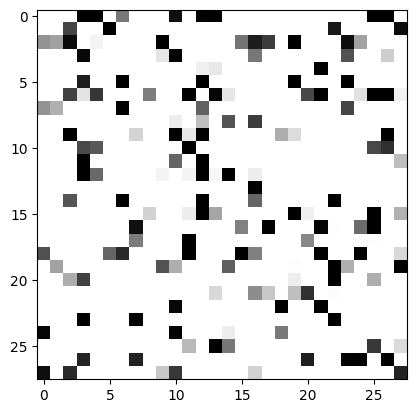

In [22]:
order=list(range(28*28))
np.random.shuffle(order)
order=np.array(order).reshape(28,28)
test_img=number_xtrain[0].flatten()[order]
plt.imshow(test_img,cmap='binary')

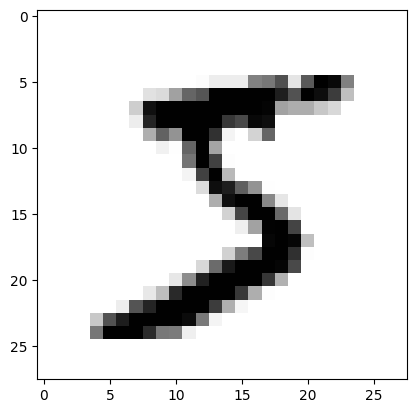

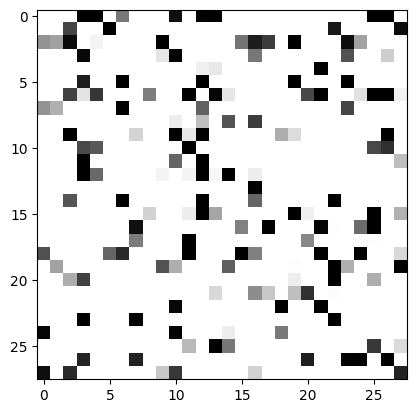

5


In [23]:
shuffled_xtrain=np.zeros([60000,28,28])
shuffled_xtest=np.zeros([10000,28,28])
shuffled_ytrain=number_ytrain
shuffled_ytest=number_ytest
for i in range(60000):
  shuffled_xtrain[i]=number_xtrain[i].flatten()[order]
for j in range(10000):
  shuffled_xtest[j]=number_xtest[j].flatten()[order]
plt.imshow(number_xtrain[0],cmap='binary')
plt.show()
plt.imshow(shuffled_xtrain[0],cmap='binary')
plt.show()
print(number_ytrain[0])

In [24]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(shuffled_xtrain,shuffled_ytrain,batch_size=50,epochs=5)
model.evaluate(shuffled_xtest,shuffled_ytest)

Epoch 1/5
1200/1200 [==============================] - 2s 1ms/step - loss: 0.3418 - acc: 0.9000
Epoch 2/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1533 - acc: 0.9558
Epoch 3/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1149 - acc: 0.9657
Epoch 4/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0913 - acc: 0.9729
Epoch 5/5
313/313 [==============================] - 0s 858us/step - loss: 0.0942 - acc: 0.9710


[0.09420019388198853, 0.9710000157356262]

Surprisingly, DNN can recognize shuffled image data while human cannot becuase DNN does not.

It does not mean that feedfoward DNN shows higher performance than human, but it means that image recognition using feedfowrad DNN is not reliable. They should not recognize shuffled image.

To overcome this problem, we need to consider local information.

# **2. Convolutional Neural Network(CNN)**

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
(number_xtrain, number_ytrain), (number_xtest,number_ytest) = tf.keras.datasets.mnist.load_data()
number_xtrain=number_xtrain/255  # normalization
number_xtest=number_xtest/255
shuffled_xtrain=np.zeros([60000,28,28])
shuffled_xtest=np.zeros([10000,28,28])
shuffled_ytrain=number_ytrain
shuffled_ytest=number_ytest
for i in range(60000):
  shuffled_xtrain[i]=number_xtrain[i].flatten()[order]
for j in range(10000):
  shuffled_xtest[j]=number_xtest[j].flatten()[order]

CNN has 2 more layers than feedfoward DNN; convolution, pooling.

Convolution is obtaining weighted sum of nearest neighbors. In this way, we can consider local information.

Pooling is method to simplify data. We can take average value of nearest neighbors. Pooling is needed to reduce number of parameters.



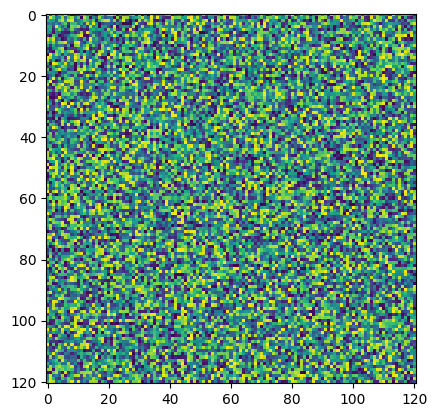

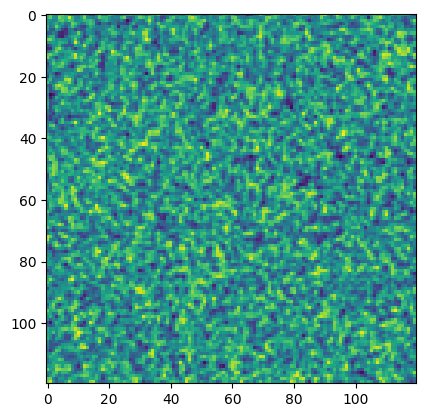

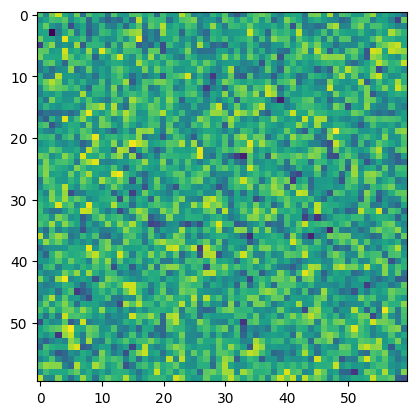

In [26]:
test=np.random.random(121*121).reshape(121,121)
plt.imshow(test)
plt.show()
result=np.zeros(120*120).reshape(120,120)
for i in range(120):
  for j in range(120):
    result[i][j]=test[i][j]+test[i+1][j]+test[i][j+1]+test[i+1][j+1]
plt.imshow(result)
plt.show()
pool=np.zeros(60*60).reshape(60,60)
for i in range(60):
  for j in range(60):
    pool[i][j]=max(result[2*i][2*j],result[2*i+1][2*j],result[2*i][2*j+1],result[2*i+1][2*j+1])
plt.imshow(pool)
plt.show()

**layers.Conv2D()** : Create 2D convolution layer

input_shape : Shape of input image

filters : The number of convolution layer 

kernel_size : Size of the convolutional filter

padding : size of the extra boundary area to keep the size after convolution.

strides : choose how long filter moves.

**layers.MaxPool2D()** : Maximum pooling

**layers.AveragePooling2D()** : average pooling

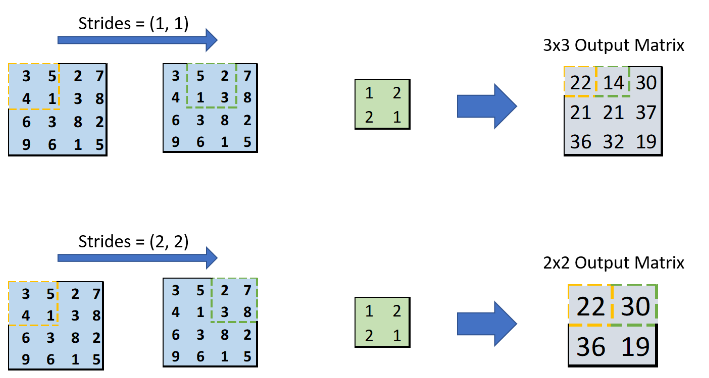

In [27]:
model=Sequential()
model.add(layers.Conv2D(input_shape=(28,28,1), kernel_size=(4, 4),filters=6, activation='relu', padding='same'))
model.add(layers.Conv2D(12, (4, 4), activation='relu', padding='same'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(24, (4, 4), activation='relu', padding='same'))
model.add(layers.Conv2D(48, (4, 4), activation='relu', padding='same'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.10))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         102       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 12)        1164      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 24)        4632      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 48)        18480     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                  

If layers are deep, we 'turn off' some of the nodes and train the rest. In this way, we can avoid overfitting problem.

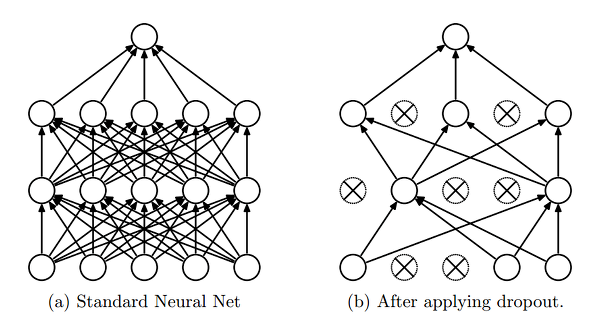

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(number_xtrain,number_ytrain,batch_size=50,epochs=5)
model.evaluate(number_xtest,number_ytest)

Epoch 1/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.1602 - acc: 0.9511
Epoch 2/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0498 - acc: 0.9847
Epoch 3/5
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0352 - acc: 0.9890
Epoch 4/5
1200/1200 [==============================] - 21s 17ms/step - loss: 0.0290 - acc: 0.9909
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0222 - acc: 0.9926


[0.022173961624503136, 0.9926000237464905]

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(shuffled_xtrain,shuffled_ytrain,batch_size=50,epochs=5)
model.evaluate(shuffled_xtest,shuffled_ytest)

Epoch 1/5
1200/1200 [==============================] - 20s 16ms/step - loss: 0.4348 - acc: 0.8638
Epoch 2/5
1200/1200 [==============================] - 20s 17ms/step - loss: 0.1734 - acc: 0.9462
Epoch 3/5
1200/1200 [==============================] - 20s 17ms/step - loss: 0.1246 - acc: 0.9610
Epoch 4/5
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0962 - acc: 0.9693
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1377 - acc: 0.9619


[0.13774549961090088, 0.961899995803833]

This model shows high accuracy too because CNN still has DNN structure. But when noise is added to original data, CNN shows better performance.

# **3. Regression in DNN**

In [30]:
# boston housing data
from keras.datasets import boston_housing
(house_xtrain,house_ytrain),(house_xtest,house_ytest)=boston_housing.load_data(path='boston_housing.npz', test_split=0.2)

57026/57026 [==============================] - 0s 1us/step


In [31]:
house_xtrain.shape

(404, 13)

In [32]:
house_xtest.shape

(102, 13)

In [33]:
# normalization
mean=house_xtrain.mean(axis=0)
std=house_xtrain.std(axis=0)
house_xtrain=(house_xtrain-mean)/std
house_xtest=(house_xtest-mean)/std

In [34]:
model_2=Sequential()
model_2.add(layers.InputLayer(input_shape=(13,))) 
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.15))
model_2.add(layers.Dense(64, activation='sigmoid'))
model_2.add(layers.Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
model_2.fit(house_xtrain,house_ytrain,batch_size=1,epochs=20)
model_2.evaluate(house_xtest,house_ytest)

Epoch 1/20
404/404 [==============================] - 1s 688us/step - loss: 241.4341 - mae: 12.0256
Epoch 2/20
404/404 [==============================] - 0s 663us/step - loss: 68.9147 - mae: 5.3452
Epoch 3/20
404/404 [==============================] - 0s 661us/step - loss: 46.7646 - mae: 4.3598
Epoch 4/20
404/404 [==============================] - 0s 664us/step - loss: 35.2741 - mae: 3.6297
Epoch 5/20
404/404 [==============================] - 0s 662us/step - loss: 29.5310 - mae: 3.3243
Epoch 6/20
404/404 [==============================] - 0s 669us/step - loss: 24.4192 - mae: 3.0698
Epoch 7/20
404/404 [==============================] - 0s 659us/step - loss: 21.4477 - mae: 2.9012
Epoch 8/20
404/404 [==============================] - 0s 657us/step - loss: 20.7659 - mae: 2.8859
Epoch 9/20
404/404 [==============================] - 0s 673us/step - loss: 19.0508 - mae: 2.7983
Epoch 10/20
404/404 [==============================] - 0s 673us/step - loss: 16.4803 - mae: 2.6728
Epoch 11/20
404/4

[19.345584869384766, 2.8689942359924316]

In [35]:
# comparison with multilinear regression 
from sklearn import linear_model
regression=linear_model.LinearRegression()
regression.fit(house_xtrain,house_ytrain) 
regression.score(house_xtest,house_ytest)

0.7213535934621553

In [36]:
y_predict=regression.predict(house_xtest)
y_predict
np.mean(np.abs(house_ytest-y_predict))

3.464185812406716

In [37]:
from sklearn.datasets import load_diabetes
diabete_xtrain, diabete_xtest, diabete_ytrain, diabete_ytest = train_test_split(load_diabetes()['data'],load_diabetes()['target'],test_size=0.15)
load_diabetes().feature_names

NameError: name 'train_test_split' is not defined